# Data Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [2]:
posts= pd.read_csv("../data/men_women_posts.csv")
posts.head()

,subreddit,selftext,title
0,AskWomen,[removed],What is lying about feelings to get consent? I...
1,AskWomen,[removed],How can you be physically attracted to a man w...
2,AskWomen,[removed],Who else is thinking about leaving the US?
3,AskWomen,[removed],How to respond to “I’m not into you”
4,AskWomen,[removed],"Ladies, how do you get over a man you can’t have?"


In [3]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9984 entries, 0 to 9983
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  9984 non-null   object
 1   selftext   6585 non-null   object
 2   title      9984 non-null   object
dtypes: object(3)
memory usage: 234.1+ KB


In [4]:
posts.isnull().sum()

subreddit       0
selftext     3399
title           0
dtype: int64

In [5]:
# we can drop the selftext column bc we will not be using it 

posts.drop(columns= "selftext", inplace= True)
posts.head(2)

,subreddit,title
0,AskWomen,What is lying about feelings to get consent? I...
1,AskWomen,How can you be physically attracted to a man w...


#### We want to drop any duplicates based on the title column. 

In [6]:
posts.drop_duplicates(subset= ["title"], keep= "first", ignore_index= True, inplace= True)
posts.shape

(9588, 2)

In [7]:
posts["subreddit"].value_counts(normalize= True)

AskWomen    0.505111
AskMen      0.494889
Name: subreddit, dtype: float64

In [8]:
posts["subreddit"].value_counts()

AskWomen    4843
AskMen      4745
Name: subreddit, dtype: int64

We still have pretty balanced classes and more than 4000 for each subreddit after dropping duplicated, so we can move forward.

#### Next we will binarize our target column: subreddit

In [9]:
# AskWomen will be marked as 1 and AskMen marked as 0

posts["subreddit"]= posts["subreddit"].map({"AskWomen": 1, "AskMen": 0})

posts["subreddit"].value_counts(normalize= True)

1    0.505111
0    0.494889
Name: subreddit, dtype: float64

In [10]:
# we can save the cleaned dataset to a csv

posts.to_csv("../data/men_women_posts_cleaned.csv", index= False)

#### Let's look at the length and word count statistics

In [11]:
posts["length"] = posts["title"].apply(len)

In [12]:
posts["word_count"] = posts["title"].apply(lambda x: len(x.split()))
posts.head()

,subreddit,title,length,word_count
0,1,What is lying about feelings to get consent? I...,71,12
1,1,How can you be physically attracted to a man w...,82,14
2,1,Who else is thinking about leaving the US?,42,8
3,1,How to respond to “I’m not into you”,36,8
4,1,"Ladies, how do you get over a man you can’t have?",49,11


In [13]:
posts.describe()

,subreddit,length,word_count
count,9588.000000,9588.000000,9588.000000
mean,0.505111,67.742699,12.937005
std,0.500000,39.661828,7.552576
min,0.000000,1.000000,1.000000
25%,0.000000,42.000000,8.000000
50%,1.000000,59.000000,11.000000
75%,1.000000,83.000000,16.000000
max,1.000000,302.000000,63.000000


In [14]:
women = posts[posts["subreddit"] == 1]
men = posts[posts["subreddit"] == 0]

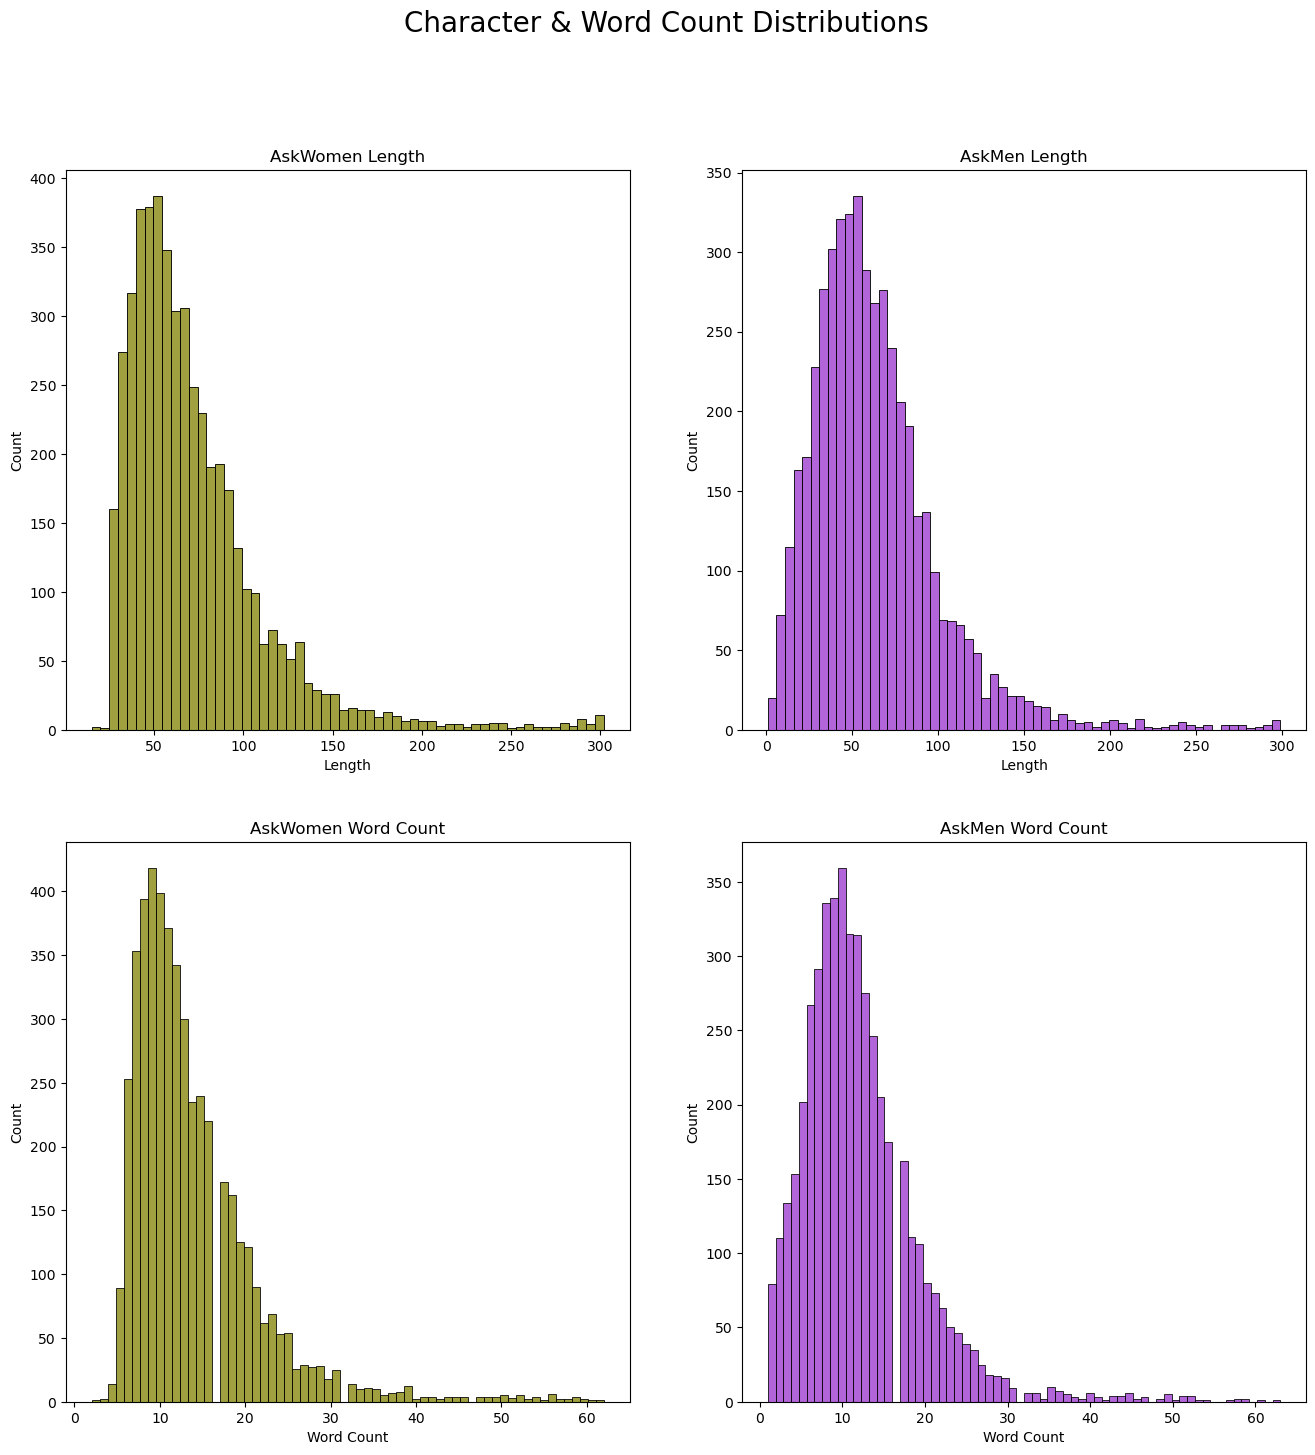

In [15]:
# based off 5.05 lesson nlp-eda

fig, ax =  plt.subplots(2, 2, figsize=(16,16))
sns.histplot(women["length"], ax=ax[0,0], color= "olive")
sns.histplot(men["length"], ax=ax[0,1], color= "darkorchid")
sns.histplot(women["word_count"], ax=ax[1,0], color= "olive")
sns.histplot(men["word_count"], ax=ax[1,1], color= "darkorchid")

ax[0,0].set(xlabel='Length', title= "AskWomen Length")
ax[0,1].set(xlabel='Length', title= "AskMen Length")
ax[1,0].set(xlabel='Word Count', title= "AskWomen Word Count")
ax[1,1].set(xlabel='Word Count', title= "AskMen Word Count")

fig.suptitle('Character & Word Count Distributions', fontsize=20);
plt.savefig("../images/char_word_count_dist.png")

#### Let's look at the top N-grams

In [16]:
# looking at the top words

cv= CountVectorizer(stop_words= stopwords.words("english"))

women_cv= cv.fit_transform(women["title"])
women_cv_df= pd.DataFrame(women_cv.todense(), columns= cv.get_feature_names_out())

men_cv= cv.fit_transform(men["title"])
men_cv_df= pd.DataFrame(men_cv.todense(), columns= cv.get_feature_names_out())


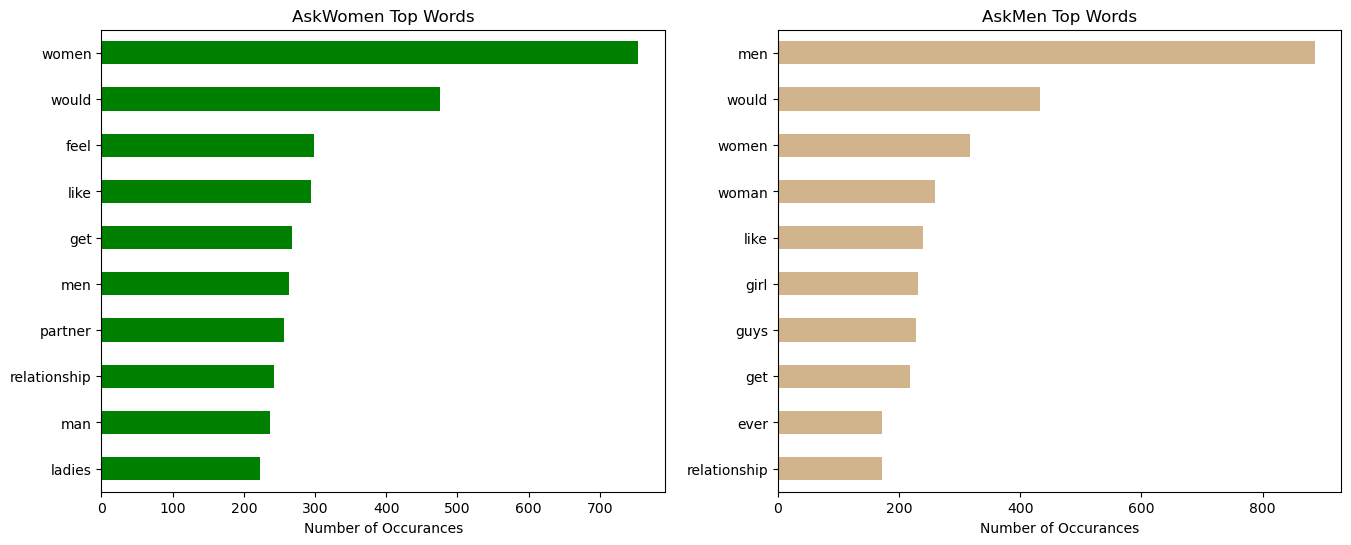

In [17]:
# using 5.5 nlp eda lesson 

fig, ax = plt.subplots(1, 2, figsize= (16,6))

women_cv_df.sum().sort_values(ascending= False).head(10).plot(kind= "barh", ax=ax[0], color= "green")

men_cv_df.sum().sort_values(ascending= False).head(10).plot(kind= "barh", ax=ax[1], color= "tan")

ax[0].set(xlabel='Number of Occurances', title= "AskWomen Top Words")
ax[1].set(xlabel='Number of Occurances', title= "AskMen Top Words")

ax[0].invert_yaxis()
ax[1].invert_yaxis();

plt.savefig("../images/top_words.png")

We probably want to add some of these words to our our stop words list becasue it makes the classification too easy.

In [18]:
cv_bi= CountVectorizer(stop_words = stopwords.words("english"), ngram_range=(2,2))

women_bi= cv_bi.fit_transform(women["title"])
women_bi_df= pd.DataFrame(women_bi.todense(), columns= cv_bi.get_feature_names_out())

men_bi= cv_bi.fit_transform(men["title"])
men_bi_df= pd.DataFrame(men_bi.todense(), columns= cv_bi.get_feature_names_out())

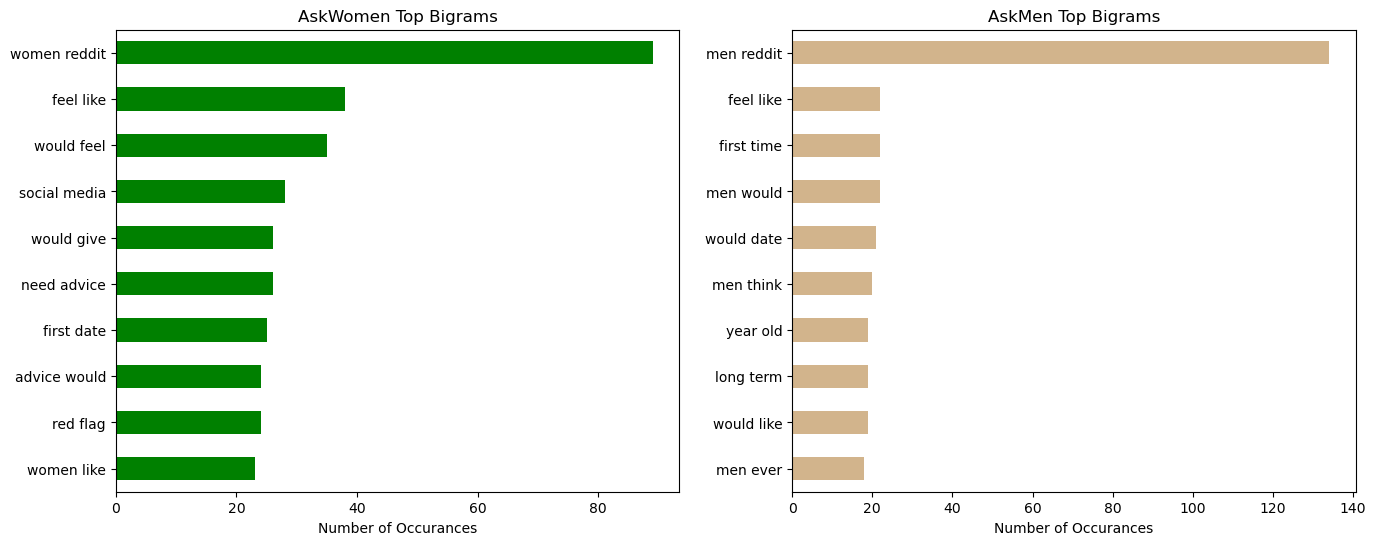

In [19]:
fig, ax = plt.subplots(1, 2, figsize= (16,6))

women_bi_df.sum().sort_values(ascending= False).head(10).plot(kind= "barh", ax=ax[0], color= "green")
men_bi_df.sum().sort_values(ascending= False).head(10).plot(kind= "barh", ax=ax[1], color= "tan")

ax[0].set(xlabel='Number of Occurances', title= "AskWomen Top Bigrams")
ax[1].set(xlabel='Number of Occurances', title= "AskMen Top Bigrams")

ax[0].invert_yaxis()
ax[1].invert_yaxis();

plt.savefig("../images/top_bigrams.png")

These seems to be more interesting to explore than the top words we found before. Again, we might want to add some words like "women" or "men" to get more interesting information.

In [20]:
stops= stopwords.words("english")

add_stop= ["women", "woman", "men", "man", "would", "ladies", "girl", "guys", 
           "feel", "like", "make", "want", "get", "know"]

combined_stop= stops + add_stop

In [21]:
cv = CountVectorizer(stop_words= combined_stop, max_features=1000)
women_cv = cv.fit_transform(women["title"])
women_cv_df = pd.DataFrame(women_cv.todense(), columns=cv.get_feature_names_out())

# Let's look at the top 20 words now
women_cv_df.sum().sort_values(ascending=False).head(20)

partner         256
relationship    243
think           212
guy             206
someone         201
sex             157
best            145
love            144
dating          136
friend          131
life            129
one             125
ever            125
advice          123
reddit          121
first           118
date            118
time            116
friends         113
go              112
dtype: int64

In [22]:
cv = CountVectorizer(stop_words= combined_stop, max_features=1000)
men_cv = cv.fit_transform(men["title"])
men_cv_df = pd.DataFrame(men_cv.todense(), columns=cv.get_feature_names_out())

# Let's look at the top 20 words now 
men_cv_df.sum().sort_values(ascending=False).head(20)

relationship    172
think           172
ever            172
reddit          165
guy             157
someone         152
life            139
dating          134
partner         134
time            129
sex             129
advice          123
love            123
best            122
one             122
girlfriend      118
date            116
friend          104
friends          99
wife             95
dtype: int64

In [23]:
cv = CountVectorizer(stop_words= combined_stop, max_features=1000, ngram_range= (2,2))
women_cv = cv.fit_transform(women["title"])
women_cv_df = pd.DataFrame(women_cv.todense(), columns=cv.get_feature_names_out())

# Let's look at the top 20 words now 
women_cv_df.sum().sort_values(ascending=False).head(20)

social media            28
advice give             28
need advice             26
first date              25
red flag                24
birth control           23
year old                22
best friend             21
first time              21
anyone else             20
best way                20
long take               18
one thing               15
long term               14
date guy                13
please help             12
find attractive         11
relationship someone    11
dating apps             10
body hair               10
dtype: int64

In [24]:
cv = CountVectorizer(stop_words= combined_stop, max_features=1000, ngram_range= (2,2))
men_cv = cv.fit_transform(men["title"])
men_cv_df = pd.DataFrame(men_cv.todense(), columns=cv.get_feature_names_out())

# Let's look at the top 20 words now 
men_cv_df.sum().sort_values(ascending=False).head(20)

first time         22
year old           19
long term          19
best way           18
anyone else        18
first date         17
one thing          17
best friend        17
red flag           17
need help          17
need advice        14
guy friend         12
social media       12
reddit ever        11
dating apps        11
dating app         10
advice give        10
even though        10
wife girlfriend    10
someone else       10
dtype: int64

It looks like there is a decent amount of overlap between the two subreddits's posts, but I still believe we can create a model that can classify which subreddit a post is from that is better than a simple 50-50 guess. 